In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy.io import fits

from lvmdrp.core.constants import CON_LAMPS, SPEC_CHANNELS
from lvmdrp.utils import metadata as md
from lvmdrp import config, log, path, __version__ as drpver
from lvmdrp.functions import imageMethod, rssMethod
from lvmdrp.core import tracemask, rss

plt.style.use("seaborn-v0_8-talk")

In [2]:
flats = md.get_metadata(kind="master", imagetyp="flat")
flats = flats.loc[flats.name.str.contains("ldls") | flats.name.str.contains("quartz")]
flats.sort_values(by="camera", inplace=True)
flats

[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5
[INFO]: found 220 frames in store '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5'
[INFO]: filtering by imagetyp = 'flat'
[INFO]: number of frames after filtering 18
[INFO]: total number of frames found 18


tileid    mjd   rmjd imagetyp spec camera  exptime   neon   hgne  krypton  \
6    1111  60147  60147     flat  sp1     b1    150.0  False  False    False   
7    1111  60147  60147     flat  sp2     b2    150.0  False  False    False   
8    1111  60147  60147     flat  sp3     b3    150.0  False  False    False   
0    1111  60147  60147     flat  sp1     r1    150.0  False  False    False   
3    1111  60147  60147     flat  sp2     r2    150.0  False  False    False   
4    1111  60147  60147     flat  sp3     r3    150.0  False  False    False   
2    1111  60147  60147     flat  sp1     z1     10.0  False  False    False   
1    1111  60147  60147     flat  sp2     z2     10.0  False  False    False   
5    1111  60147  60147     flat  sp3     z3     10.0  False  False    False   

   ...  argon   ldls  quartz    quality qual  stage  status  drpqual  nframes  \
6  ...  False   True   False  excellent    0      1       0        0        2   
7  ...  False   True   False  excellent    0      1       0        0        2   
8  ...  False   True   False  excellent    0      1       0        0        2   
0  ...  False   True   False  excellent    0      1       0        0        2   
3  ...  False   True   False  excellent    0      1       0        0        2   
4  ...  False   True   False  excellent    0      1       0        0        2   
2  ...  False  False    True  excellent    0      1       0        0        2   
1  ...  False  False    True  excellent    0      1       0        0        2   
5  ...  False  False    True  excellent    0      1       0        0        2   

                  name  
6    lvm-mflat_ldls-b1  
7    lvm-mflat_ldls-b2  
8    lvm-mflat_ldls-b3  
0    lvm-mflat_ldls-r1  
3    lvm-mflat_ldls-r2  
4    lvm-mflat_ldls-r3  
2  lvm-mflat_quartz-z1  
1  lvm-mflat_quartz-z2  
5  lvm-mflat_quartz-z3  

[9 rows x 21 columns]

[INFO]: reading continuum exposure from lvm-wmflat_ldls-b1.fits
[INFO]: caculating normalization in full wavelength range (3600.00 - 5930.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4661 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


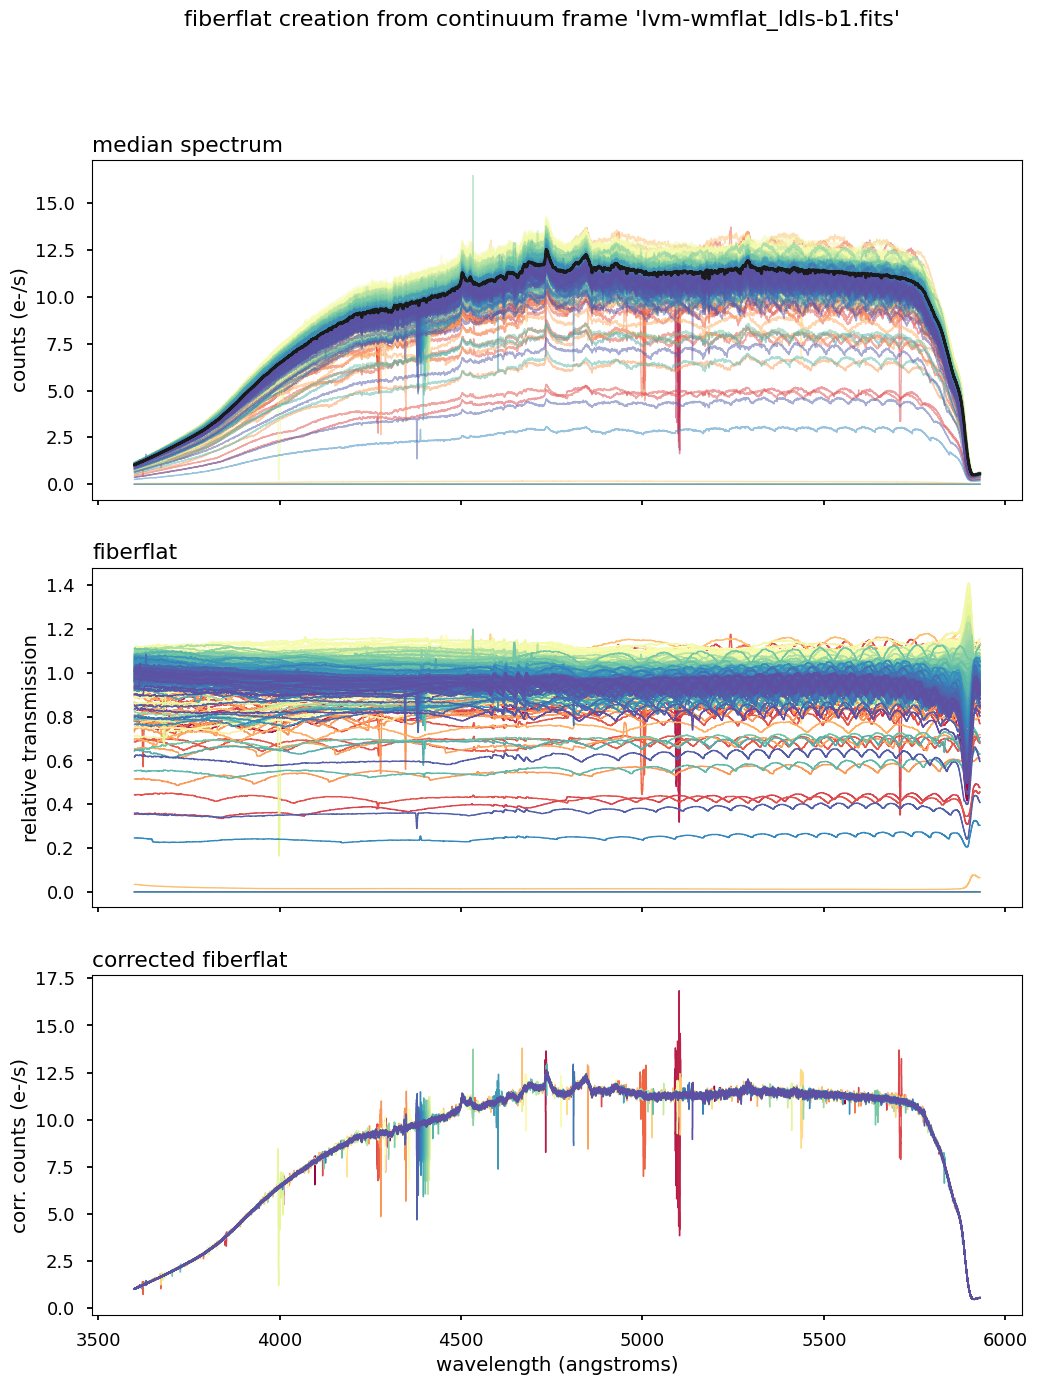

[INFO]: fiberflat statistics: min = 0.010, max = 1.410, mean = 0.99, median = 1.00, std = 0.098
[INFO]: writing fiberflat to lvm-mflat-b1.fits
[INFO]: reading continuum exposure from lvm-wmflat_ldls-b2.fits
[INFO]: caculating normalization in full wavelength range (3600.00 - 5930.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4661 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

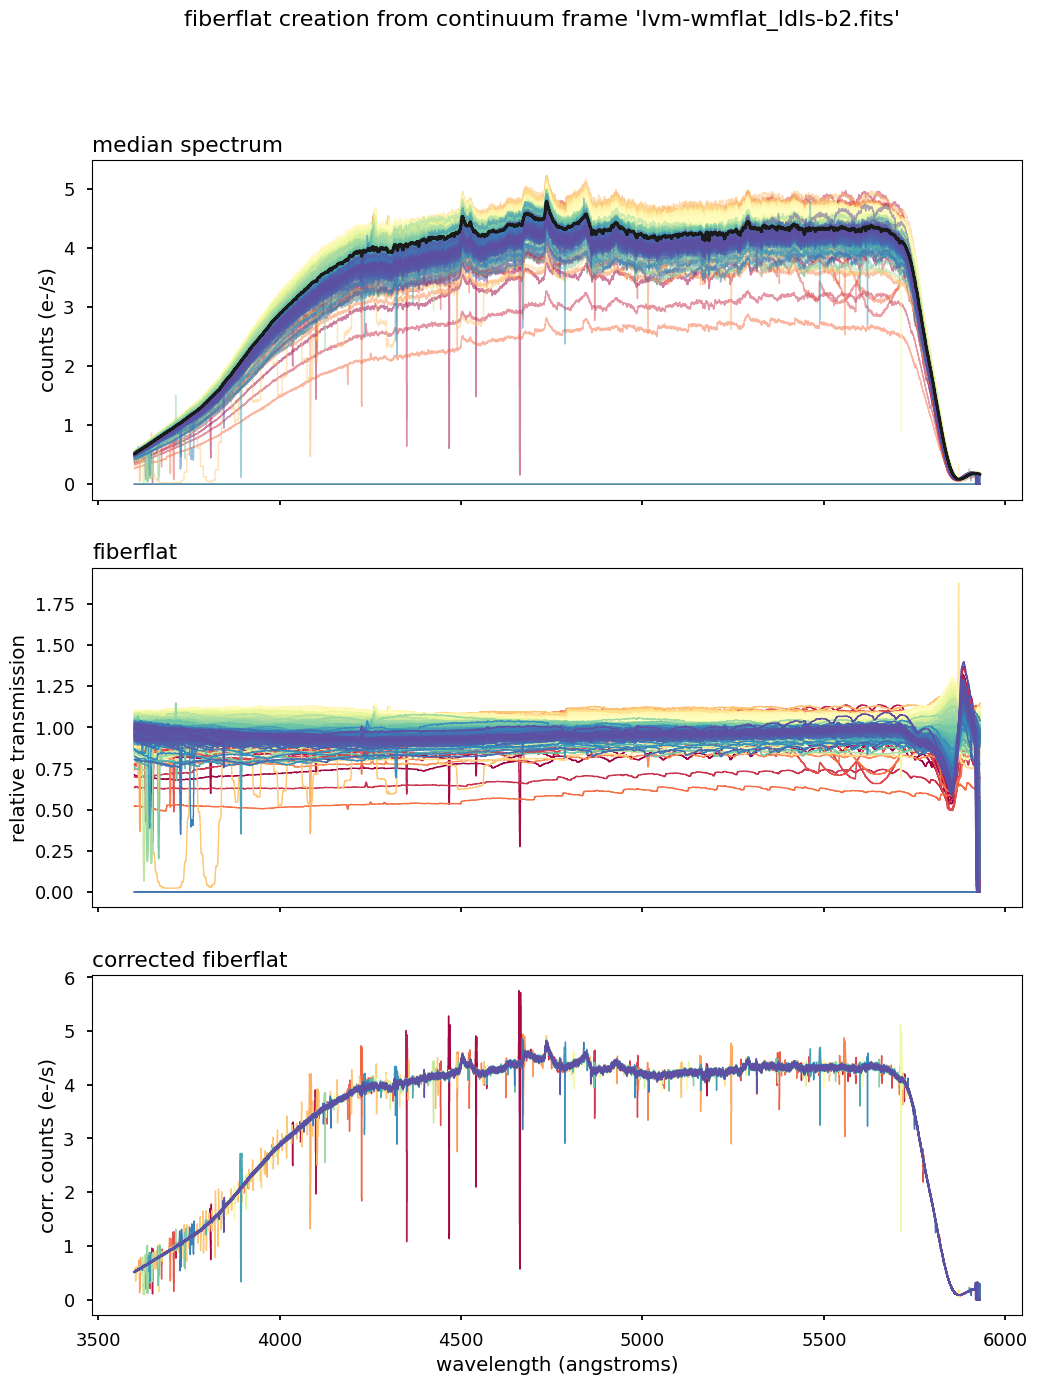

[INFO]: fiberflat statistics: min = 0.022, max = 1.879, mean = 1.00, median = 1.00, std = 0.065
[INFO]: writing fiberflat to lvm-mflat-b2.fits
[INFO]: reading continuum exposure from lvm-wmflat_ldls-b3.fits
[INFO]: caculating normalization in full wavelength range (3600.00 - 5930.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4661 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

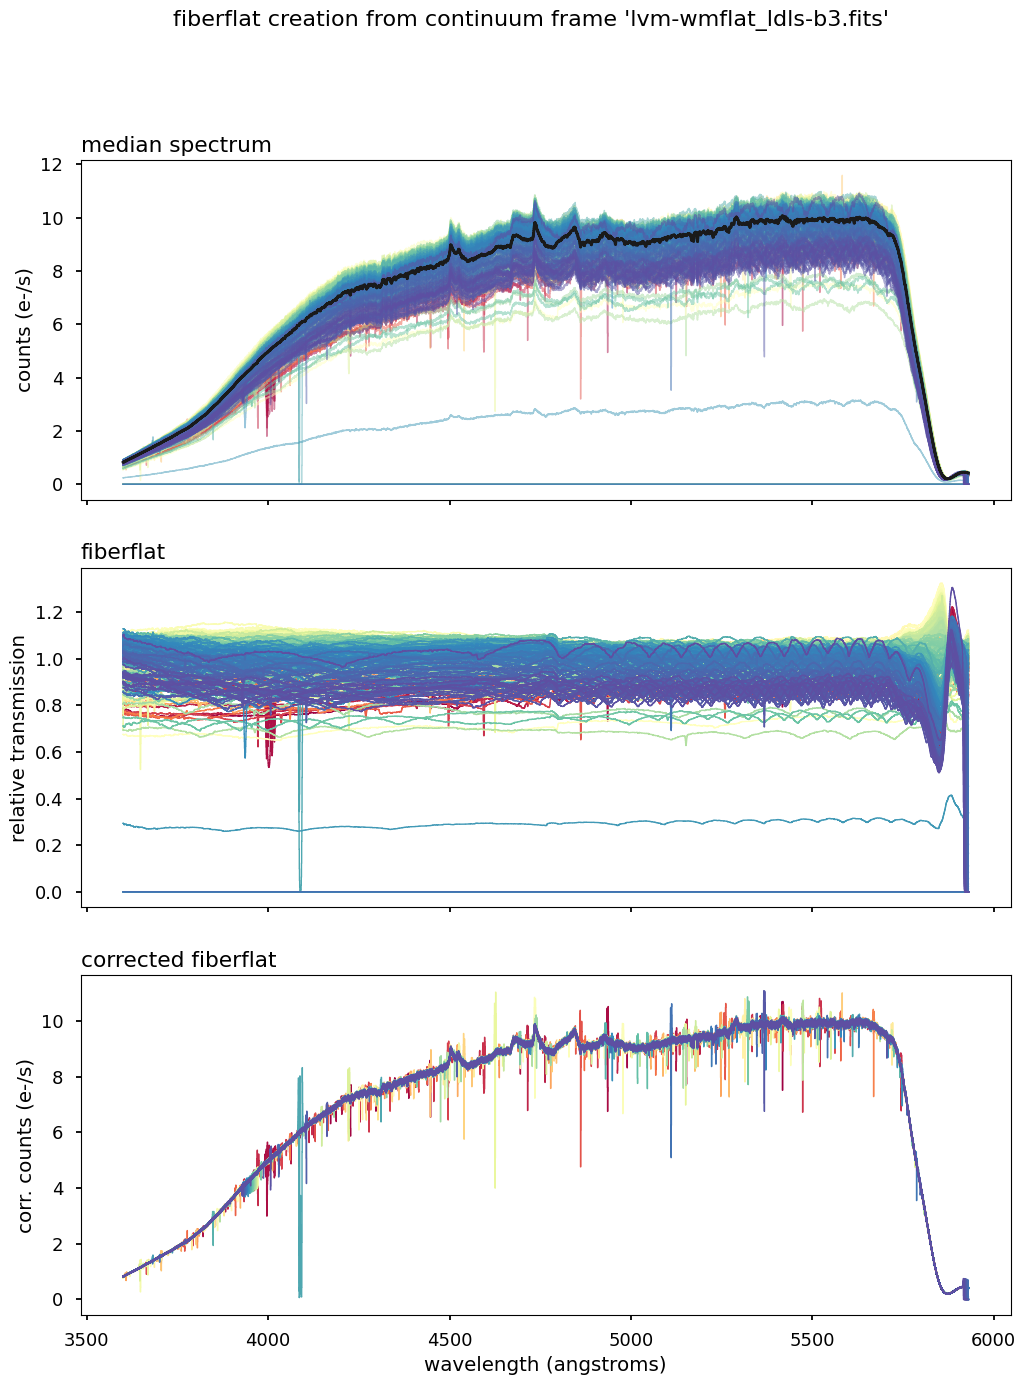

[INFO]: fiberflat statistics: min = 0.001, max = 1.325, mean = 0.99, median = 1.00, std = 0.076
[INFO]: writing fiberflat to lvm-mflat-b3.fits
[INFO]: reading continuum exposure from lvm-wmflat_ldls-r1.fits
[INFO]: caculating normalization in full wavelength range (5660.00 - 7720.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4121 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

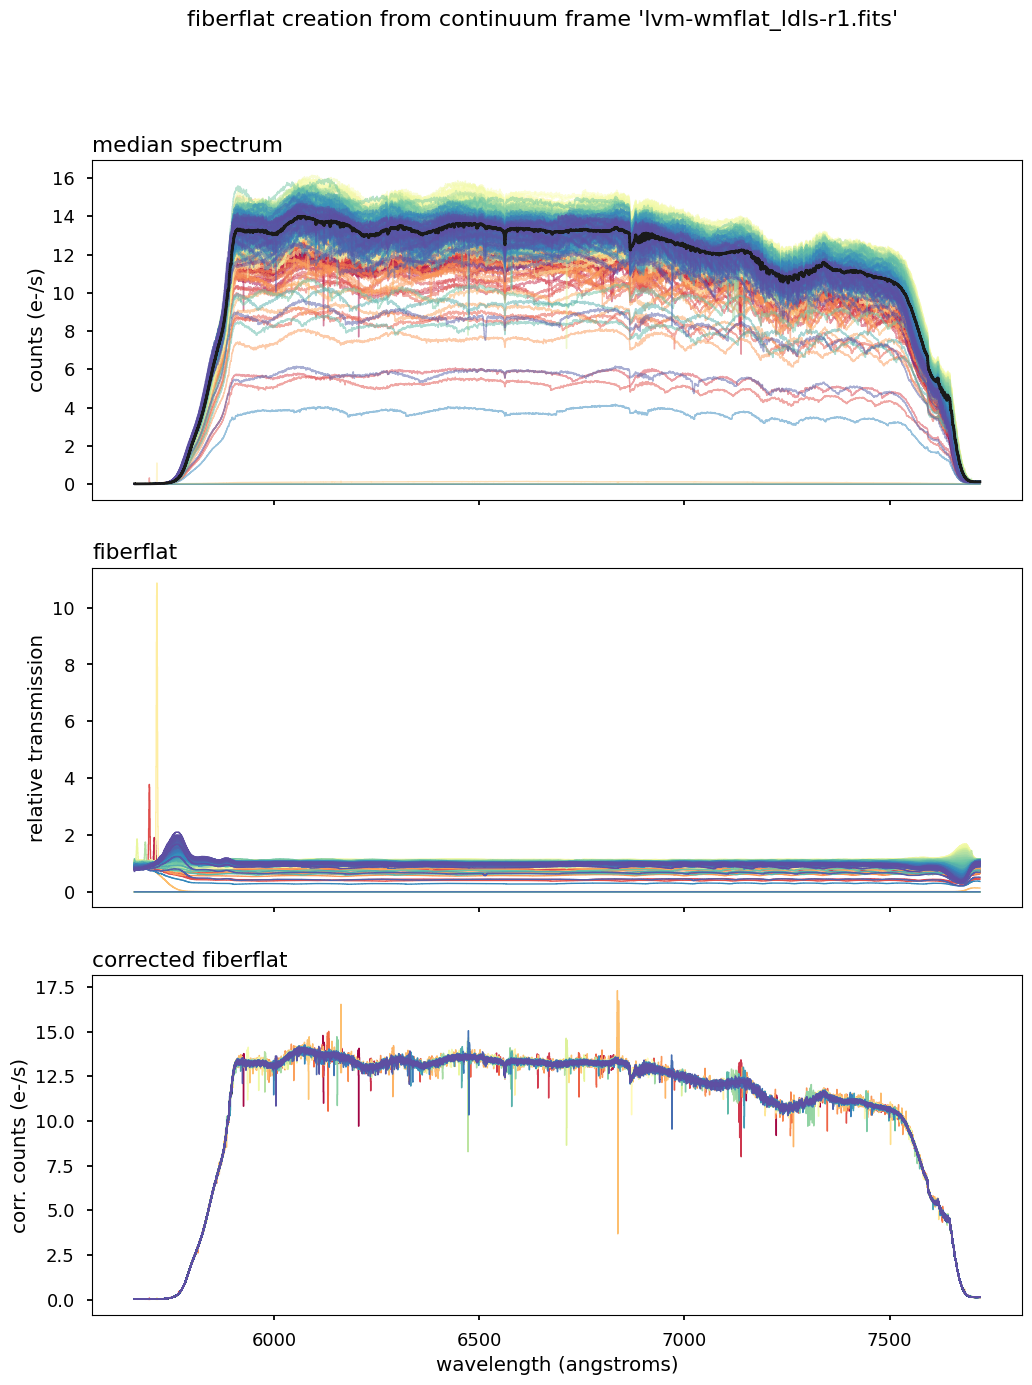

[INFO]: fiberflat statistics: min = 0.006, max = 10.866, mean = 0.99, median = 1.00, std = 0.120
[INFO]: writing fiberflat to lvm-mflat-r1.fits
[INFO]: reading continuum exposure from lvm-wmflat_ldls-r2.fits
[INFO]: caculating normalization in full wavelength range (5660.00 - 7720.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4121 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

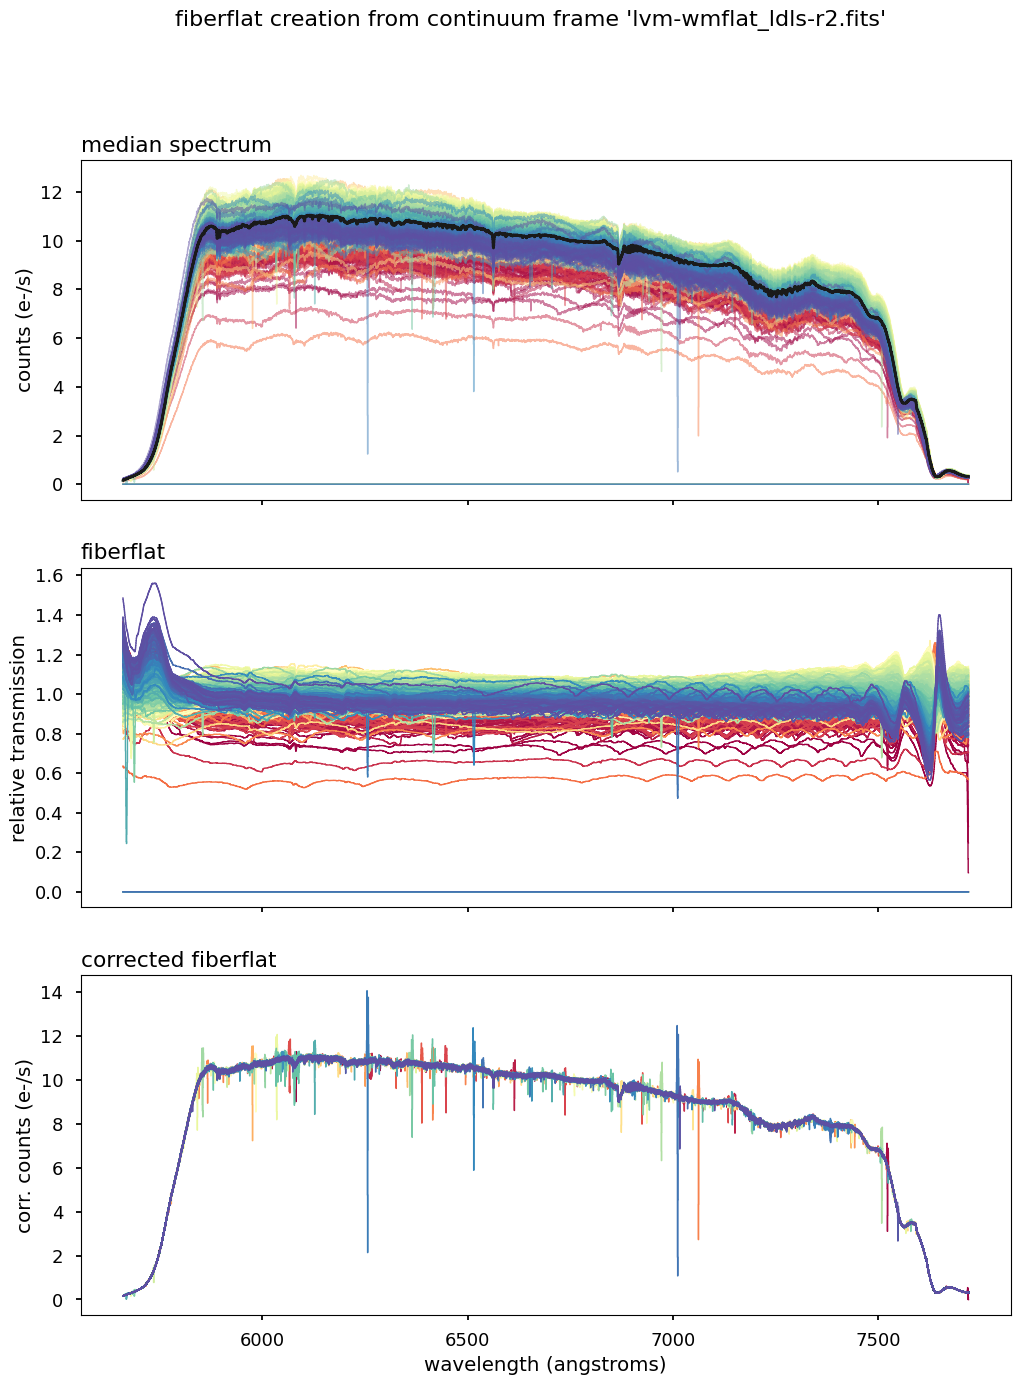

[INFO]: fiberflat statistics: min = 0.244, max = 1.562, mean = 0.99, median = 1.00, std = 0.074
[INFO]: writing fiberflat to lvm-mflat-r2.fits
[INFO]: reading continuum exposure from lvm-wmflat_ldls-r3.fits
[INFO]: caculating normalization in full wavelength range (5660.00 - 7720.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4121 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

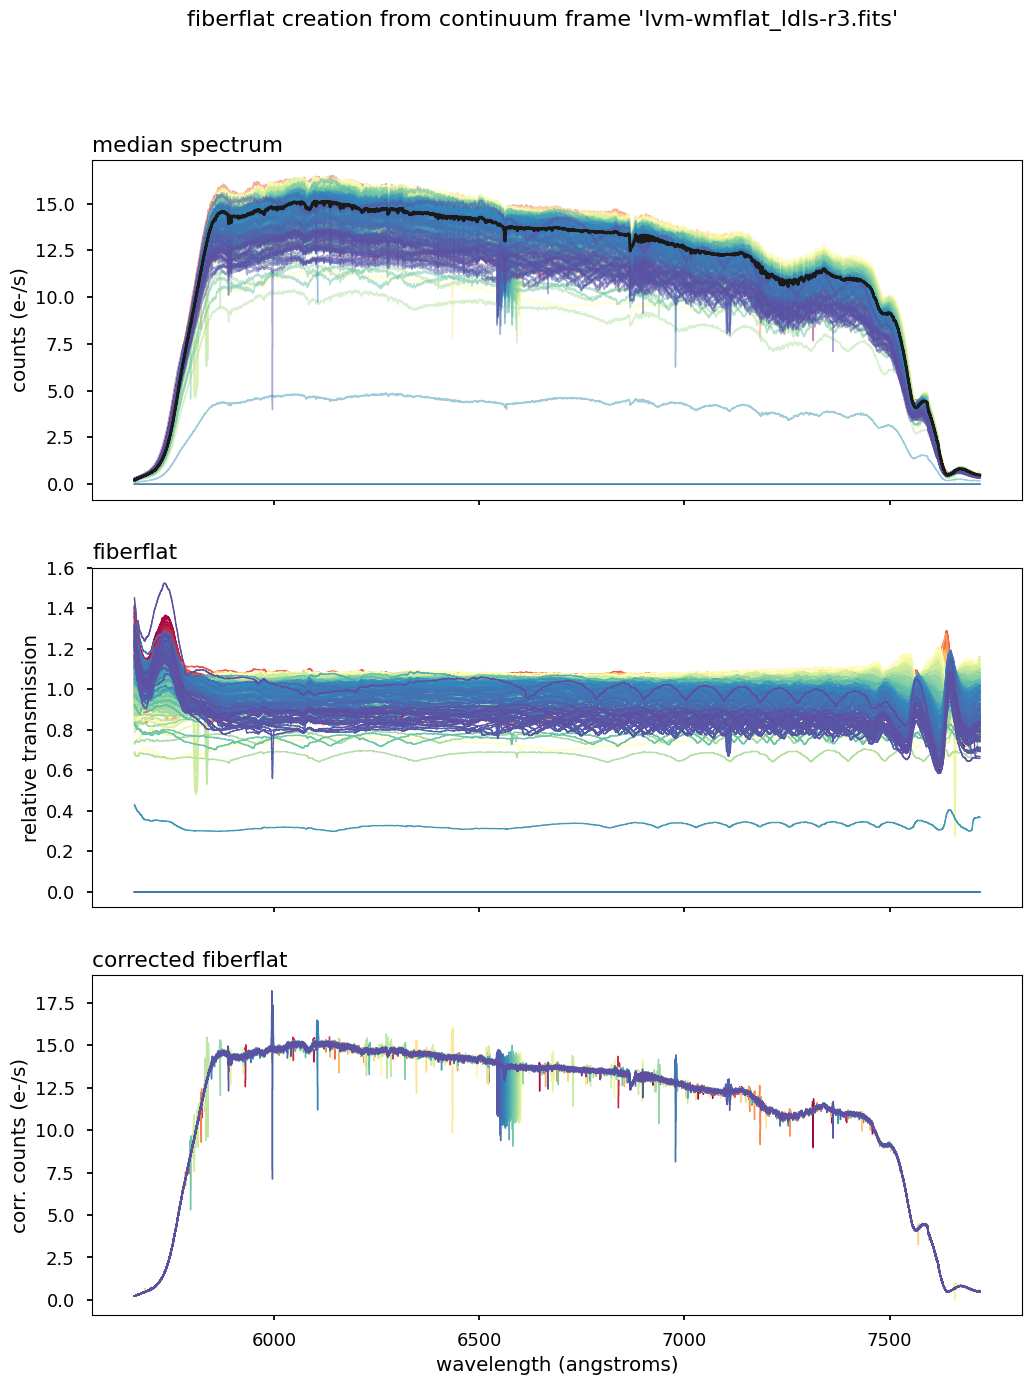

[INFO]: fiberflat statistics: min = 0.274, max = 1.525, mean = 0.99, median = 1.00, std = 0.072
[INFO]: writing fiberflat to lvm-mflat-r3.fits
[INFO]: reading continuum exposure from lvm-wmflat_quartz-z1.fits
[INFO]: caculating normalization in full wavelength range (7470.00 - 9800.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4661 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

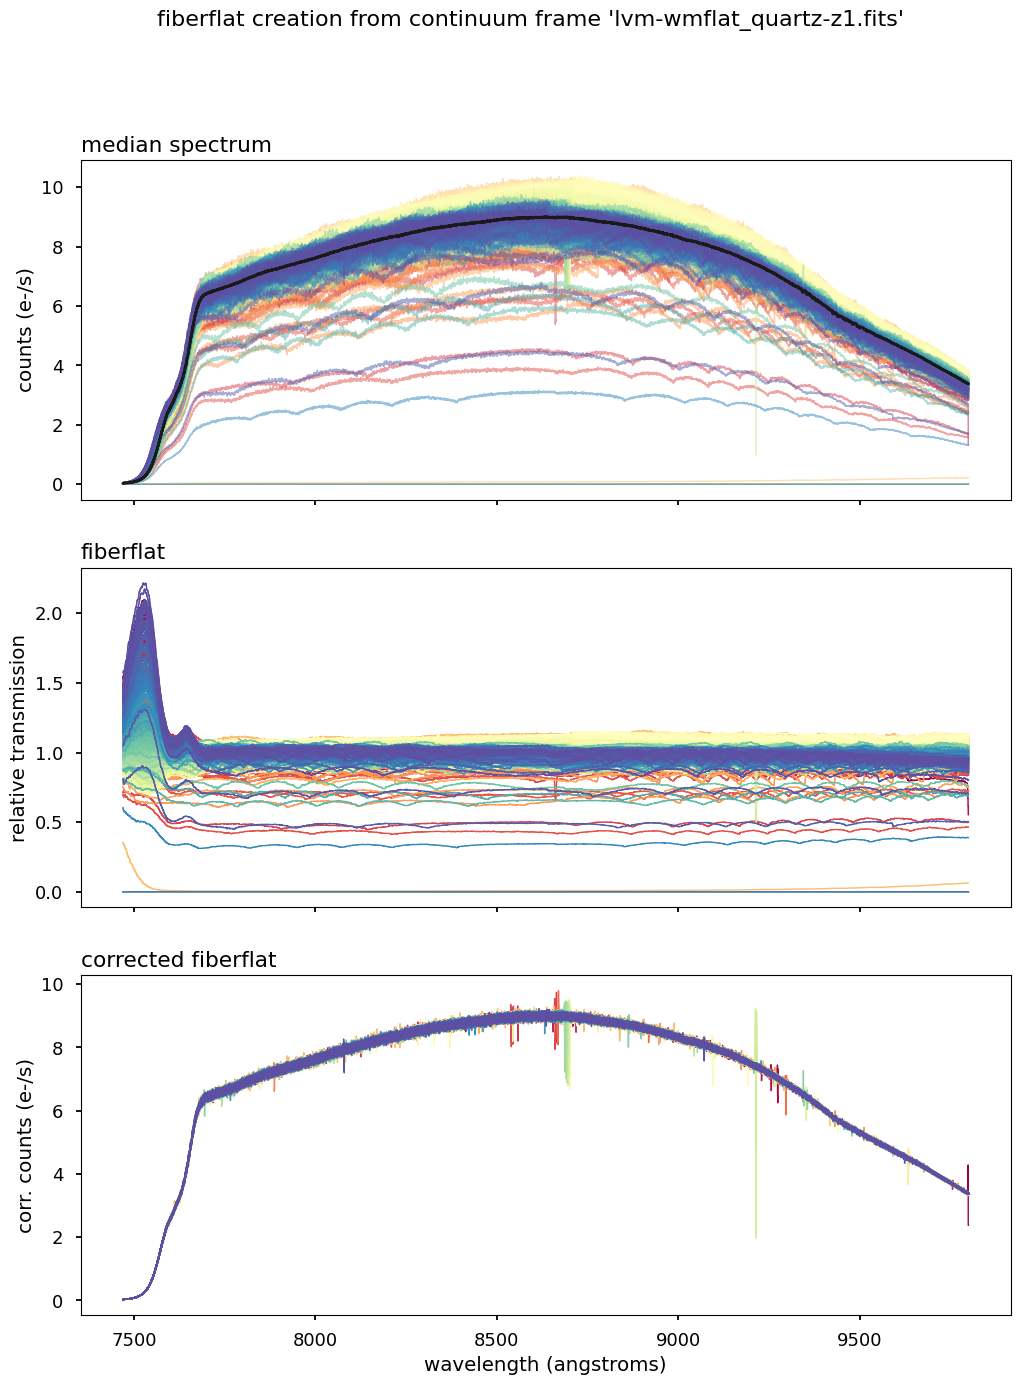

[INFO]: fiberflat statistics: min = 0.006, max = 2.218, mean = 1.00, median = 1.00, std = 0.107
[INFO]: writing fiberflat to lvm-mflat-z1.fits
[INFO]: reading continuum exposure from lvm-wmflat_quartz-z2.fits
[INFO]: caculating normalization in full wavelength range (7470.00 - 9800.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4661 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

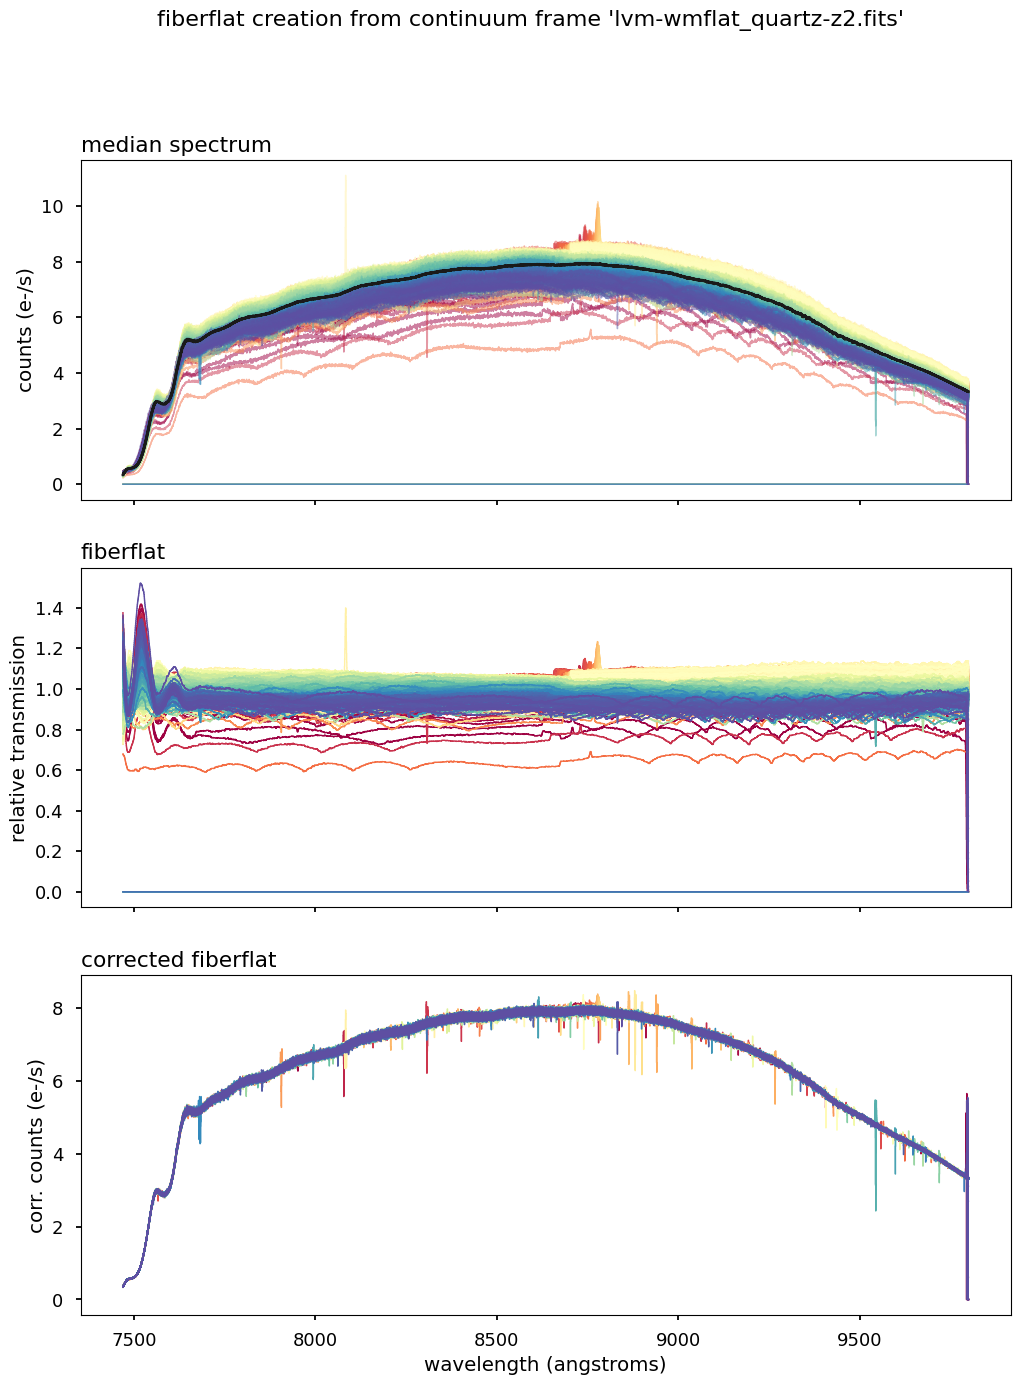

[INFO]: fiberflat statistics: min = 0.230, max = 1.522, mean = 1.00, median = 1.00, std = 0.057
[INFO]: writing fiberflat to lvm-mflat-z2.fits
[INFO]: reading continuum exposure from lvm-wmflat_quartz-z3.fits
[INFO]: caculating normalization in full wavelength range (7470.00 - 9800.00 angstroms)
[INFO]: computing fiberflat across 648 fibers and 4661 wavelength bins
[INFO]: applying gaussian smoothing with kernel size 2.5 angstroms (5 pixels)
[INFO]: creating diagnostic plots for fiberflat
[WARNING]: invalid value encountered in divide (RuntimeWarning)


<Figure size 1040x715 with 0 Axes>

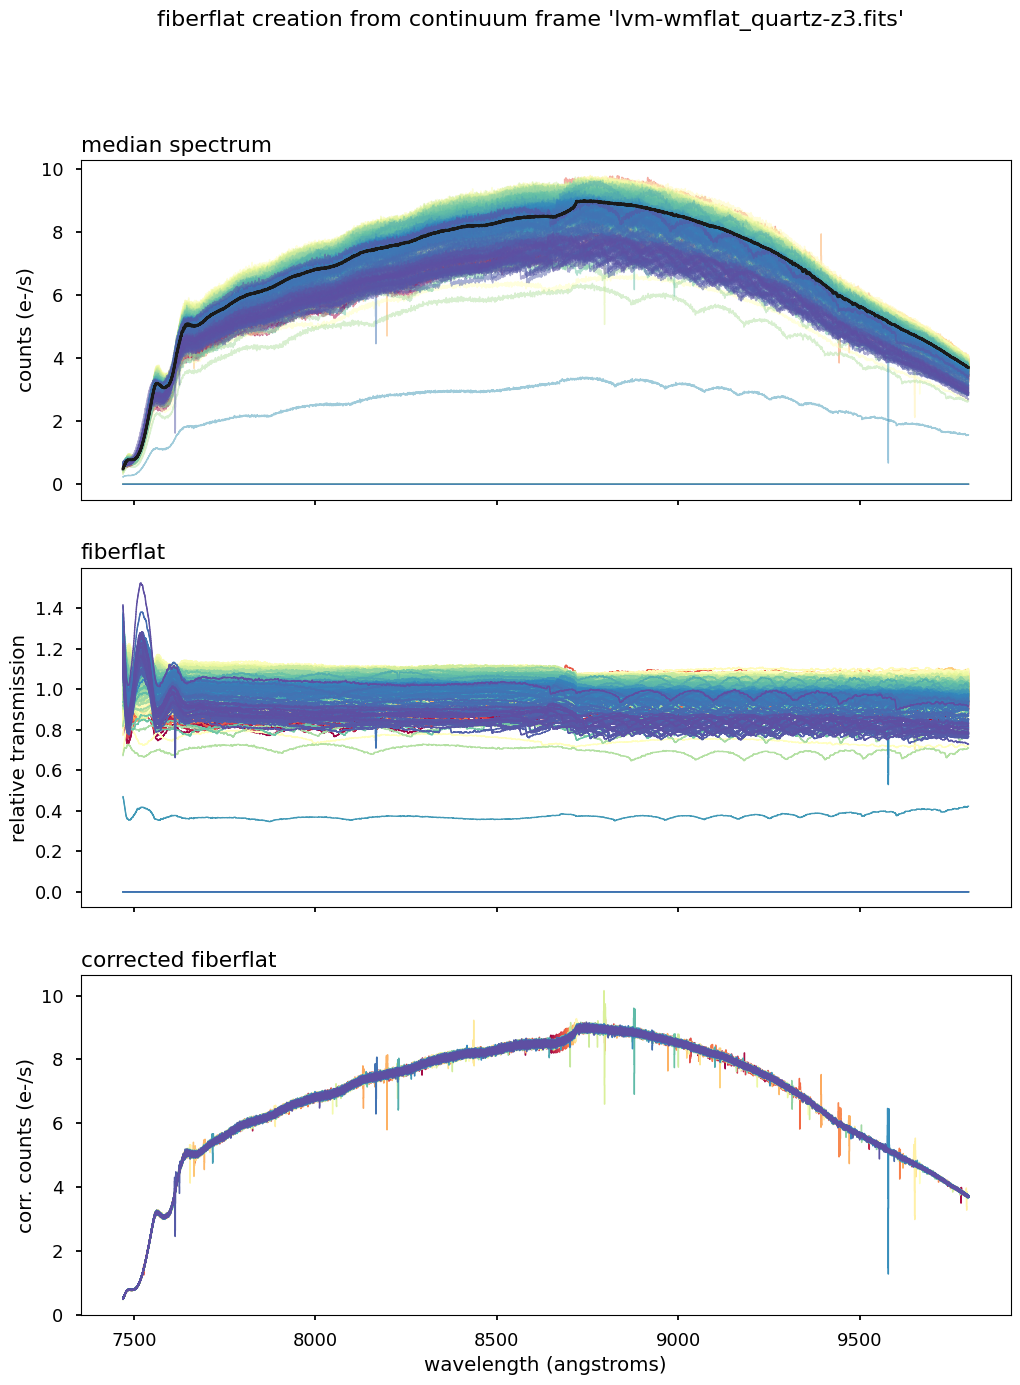

[INFO]: fiberflat statistics: min = 0.346, max = 1.524, mean = 0.99, median = 1.00, std = 0.072
[INFO]: writing fiberflat to lvm-mflat-z3.fits


<Figure size 1040x715 with 0 Axes>

In [3]:
# extract fiber flats using traces
lamps = [lamp.lower() for lamp in CON_LAMPS]
cameras = sorted(set(flats.camera))
mfiberflats = []
for _, flat in flats.iterrows():
    # get lamp used
    lamp = flat[lamps].astype(int).idxmax()
    
    # define paths
    mflat = path.full("lvm_master", drpver=drpver, kind=f"mflat_{lamp}", **flat.to_dict())
    xflat = path.full("lvm_master", drpver=drpver, kind=f"xmflat_{lamp}", **flat.to_dict())
    wflat = path.full("lvm_master", drpver=drpver, kind=f"wmflat_{lamp}", **flat.to_dict())
    mfiberflat = path.full("lvm_master", drpver=drpver, kind=f"mflat", **flat.to_dict())
    # define traces path
    mtrace = os.path.join("data_calib", f"traces_{flat.camera}_p4.fits")
    mwave = os.path.join("data_calib", f"lvm-mwave_neon-{flat.camera}.fits")
    mlsf = os.path.join("data_calib", f"lvm-mlsf_neon-{flat.camera}.fits")
    iwave, fwave = SPEC_CHANNELS[flat.camera[0]]

    # extract fiberflat
    imageMethod.extract_spectra(in_image=mflat, out_rss=xflat, in_trace=mtrace, method="aperture", aperture=3)
    rssMethod.create_pixel_table(in_rss=xflat, out_rss=wflat, arc_wave=mwave, arc_fwhm=mlsf)
    rssMethod.resample_wavelength(in_rss=wflat, out_rss=wflat, start_wave=iwave, end_wave=fwave, disp_pix=0.5, method="linear", err_sim=10, parallel=0, extrapolate=False)
    
    # compute fiberflats
    rssMethod.create_fiberflat(in_rss=wflat, out_rss=mfiberflat, median_box=0, gaussian_kernel=2.5, display_plots=True)
    mfiberflats.append(mfiberflat)

In [4]:
new_masters = md.extract_metadata(frames_paths=mfiberflats)
md.add_masters(new_masters)

[INFO]: going to extract metadata from 9 frames
extracting metadata: 100%|##############################################################################| 9/9 [00:00<00:00, 330.32frame/s]
[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60147/raw_metadata.hdf5
[INFO]: updating metadata store for tileid = 1111 and mjd = 60147 with 0 new rows
[INFO]: final number of rows 171
[INFO]: writing raw metadata store to disk
[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5
[INFO]: updating metadata store for masters with 0 new rows
[INFO]: final number of rows 220
[INFO]: writing master metadata store to disk
